#**Survival predictor**

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [283]:
warnings.filterwarnings ('ignore')

In [284]:
plt.style.use ('dark_background')

In [285]:
df = pd.read_csv ('titanic.csv')

In [286]:
df.head ()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [287]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [288]:
df['Survived'].isna ().sum ()

np.int64(0)

In [289]:
df.describe ()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [290]:
df['Pclass'].isna ().sum ()

np.int64(0)

In [291]:
df['Age'].isna ().sum ()

np.int64(177)

In [292]:
df['SibSp'].isna ().sum ()

np.int64(0)

In [293]:
df['Parch'].isna ().sum ()

np.int64(0)

In [294]:
df['Cabin'].isna ().sum ()

np.int64(687)

In [295]:
df['Ticket'].isna ().sum ()

np.int64(0)

In [296]:
df['Fare'].isna ().sum ()

np.int64(0)

In [297]:
df['Embarked'].isna ().sum ()

np.int64(2)

Text(0.5, 1.0, 'Age Distribution')

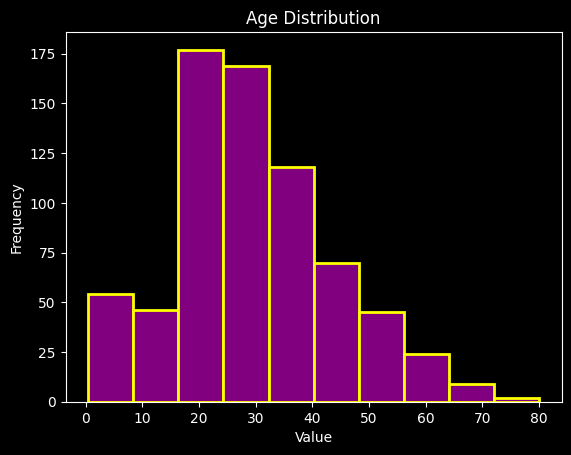

In [298]:
plt.hist (df['Age'], color = 'purple', edgecolor = 'yellow', linewidth = 2)
plt.xlabel ('Value')
plt.ylabel ('Frequency')
plt.title ('Age Distribution')

##**Replace Null Values**

In [299]:
df['Age'].fillna(df['Age'].median (), inplace = True)

In [300]:
df['Age'].isna ().sum ()

np.int64(0)

Text(0.5, 1.0, 'Cabin Distribution')

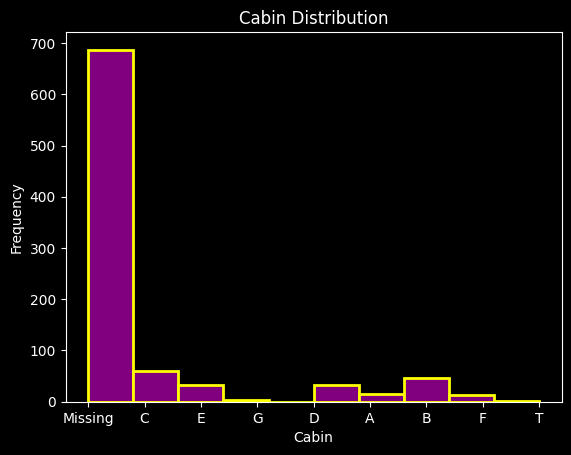

In [301]:
df['Cabin'] = df['Cabin'].str[0]
df['Cabin'] = df['Cabin'].fillna('Missing')
deck_mapping = {
    'A': 1, 'B': 2, 'C': 3, 'D': 4,
    'E': 5, 'F': 6, 'G': 7, 'T': 8,
    'Missing': 0
}
plt.hist(df['Cabin'], color='purple', edgecolor='yellow', linewidth=2)
plt.xlabel('Cabin')
plt.ylabel('Frequency')
plt.title('Cabin Distribution')

In [302]:
df['Cabin'].isna ().sum ()

np.int64(0)

Text(0.5, 1.0, 'Embarked Distribution')

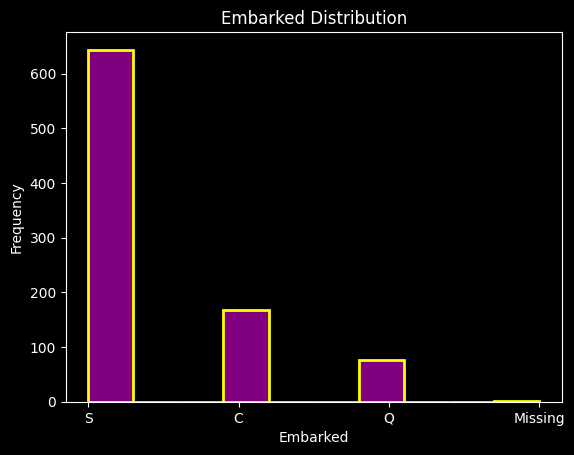

In [303]:
df['Embarked'] = df['Embarked'].str[0]
df['Embarked'] = df['Embarked'].fillna('Missing')
deck_mapping = {
    'A': 1, 'B': 2, 'C': 3, 'D': 4,
    'E': 5, 'F': 6, 'G': 7, 'T': 8,
    'Missing': 0
}
plt.hist (df['Embarked'], color = 'purple', edgecolor = 'yellow', linewidth = 2)
plt.xlabel ('Embarked')
plt.ylabel ('Frequency')
plt.title ('Embarked Distribution')

In [304]:
df['Embarked'].isna ().sum ()

np.int64(0)

## **Handle Categorical Data**


In [305]:
df['Sex'].unique ()

array(['male', 'female'], dtype=object)

In [306]:
df['Sex'].replace ({'male': 0, 'female': 1}, inplace = True)

In [307]:
df['Cabin'].unique ()

array(['Missing', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [308]:
df['Cabin'].replace ({
    'Missing': 0,
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'T': 8,
    }, inplace = True)

In [309]:
df['Cabin'].unique ()

array([0, 3, 5, 7, 4, 1, 2, 6, 8])

In [310]:
df['Embarked'].unique ()

array(['S', 'C', 'Q', 'Missing'], dtype=object)

In [311]:
df = pd.get_dummies (df, columns = ['Embarked'])

In [312]:
df.drop (['Ticket'], axis = 1, inplace = True)

In [313]:
df.drop (['Name'], axis = 1, inplace = True)

In [314]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,False,False,False,True
1,2,1,1,1,38.0,1,0,71.2833,3,True,False,False,False
2,3,1,3,1,26.0,0,0,7.9250,0,False,False,False,True
3,4,1,1,1,35.0,1,0,53.1000,3,False,False,False,True
4,5,0,3,0,35.0,0,0,8.0500,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0,False,False,False,True
887,888,1,1,1,19.0,0,0,30.0000,2,False,False,False,True
888,889,0,3,1,28.0,1,2,23.4500,0,False,False,False,True
889,890,1,1,0,26.0,0,0,30.0000,3,True,False,False,False


In [315]:
# To split data
from sklearn.model_selection import train_test_split
# Linear Regression
from sklearn.linear_model import LinearRegression

# X is for feature (Capetal letter)
# Drop the Survived: don't want it as feature i want as a lable
X = df.drop ('Survived', axis = 1)
# predection
y = df['Survived']

# train test | 20% test
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)
# Create the object
price_model = LinearRegression ()
# Teach the model
price_model.fit(X_train, y_train)
# prediction
y_pred = price_model.predict (X_test)


In [316]:
# See mean square error and r_score
from sklearn.metrics import mean_squared_error, r2_score

print ("MSE:", mean_squared_error (y_test, y_pred))
print ("R²:", r2_score (y_test, y_pred))

MSE: 0.13532574178521856
R²: 0.44195983364991154
